##CMSC320 Final Project
###Asian-American Hate Crimes and COVID-19 Trends in NYC
Maia Brydon - 05/19/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, we read in the hate crime data pulled from NYPD records and store it in a dataframe. As we are only looking at anti-Asian hate crimes, we filter out the crimes where the motive description is "ANTI-ASIAN".

In [16]:
data = pd.read_csv("NYPD_Hate_Crimes.csv")
data = data.loc[data["Bias Motive Description"] == "ANTI-ASIAN"]
data.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
14,202004412397317,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,03/28/2020,B32682489
15,202004412397317,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,03/28/2020,B32682490
16,202004412397317,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,03/28/2020,B32682492
20,202004012846517,2020,7,07/31/2020,40,PATROL BORO BRONX,BRONX,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-ASIAN,Race/Color,08/06/2020,B32692369
22,202004412397317,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,11/03/2020,B32700799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,202111312425817,2021,5,05/17/2021,113,PATROL BORO QUEENS SOUTH,QUEENS,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,"MENACING,UNCLASSIFIED",ANTI-ASIAN,Race/Color,NaN,NaN
1274,202111412400917,2021,4,04/10/2021,114,PATROL BORO QUEENS NORTH,QUEENS,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,"MENACING,UNCLASSIFIED",ANTI-ASIAN,Race/Color,NaN,NaN
1275,202111412471017,2021,5,05/01/2021,114,PATROL BORO QUEENS NORTH,QUEENS,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-ASIAN,Race/Color,NaN,NaN
1279,202111413156117,2021,10,10/24/2021,114,PATROL BORO QUEENS NORTH,QUEENS,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-ASIAN,Race/Color,NaN,NaN


Then, to get a general idea of how much anti-Asian hate crimes have increased over the course of the COVID-19 pandemic, we'll make a quick bar plot of hate crimes recorded per year available in the dataset.

Text(0.5, 1.0, 'Anti-Asian Hate Crimes in NYC per Year')

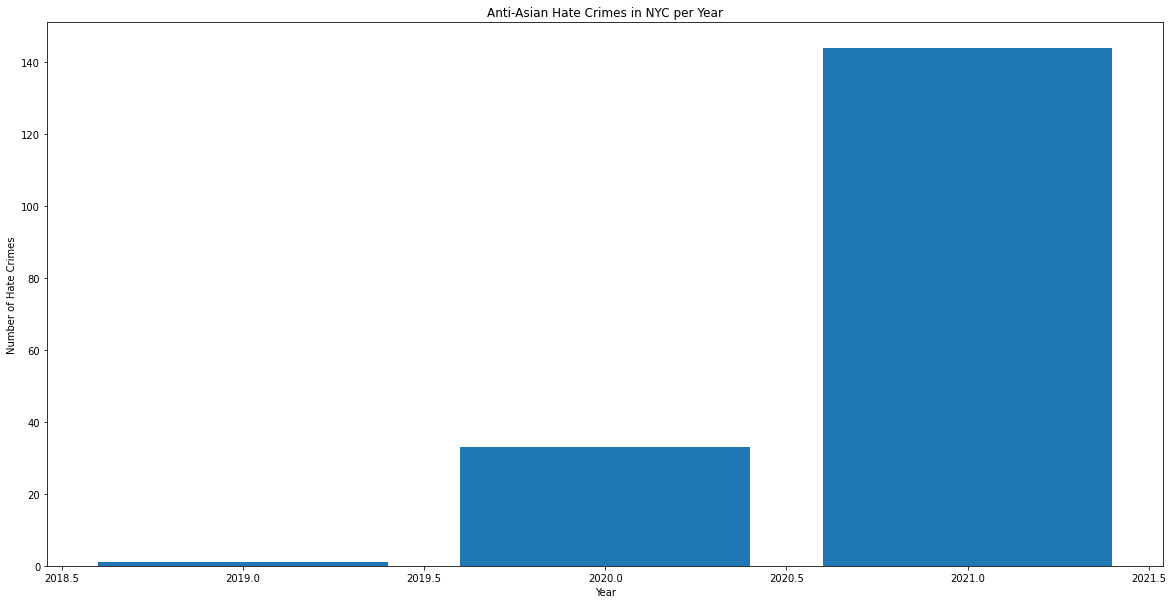

In [14]:
# plot anti-Asian hate crimes per year

years = [2019, 2020, 2021]
crime_ct = []

for year in years:
  crime_ct.append(len(data.loc[data["Complaint Year Number"] == year]))

plt.bar(years, crime_ct)
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")
plt.title("Anti-Asian Hate Crimes in NYC per Year")

As we can see from the bar graph, anti-Asian hate crimes increased greatly from 2019 to 2020, and again from 2020 to 2021. To plot a better timeline and understand how hate crimes increased from month to month, we'll make a line graph across the given time period.

Text(0.5, 1.0, 'Number of Hate Crimes Recorded from Jan 2019 to Dec 2021')

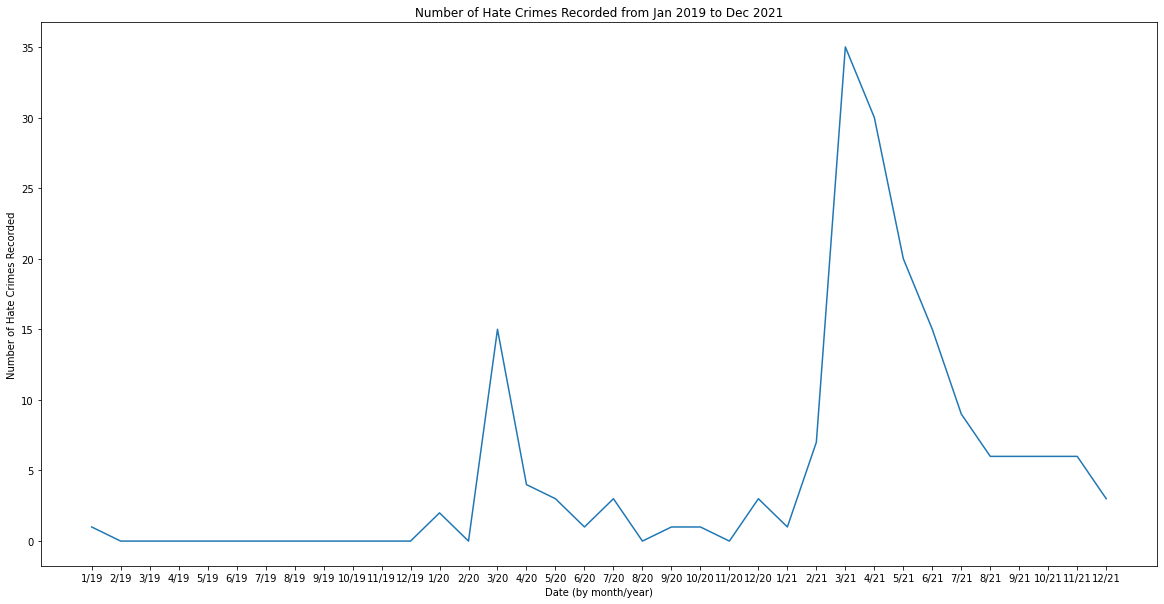

In [7]:
# plot line graph of anti-Asian hate crimes per month

crime_ct = []
dates = []

for year in years:
  for month in range(1,13):
    dates.append(str(month) + "/" + str(year)[2:4])
    crime_ct.append(len(data.loc[data["Complaint Year Number"] == year].loc[data["Month Number"] == month]))

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(dates, crime_ct)
plt.xlabel("Date (by month/year)")
plt.ylabel("Number of Hate Crimes Recorded")
plt.title("Number of Hate Crimes Recorded from Jan 2019 to Dec 2021")

There are two distinct times when anti-Asian hate crimes have spiked, March 2020 and March/April of 2021. We'll look at some other COVID-19 data from New York City records to see if we can find a correlation between that data and the hate crime data.

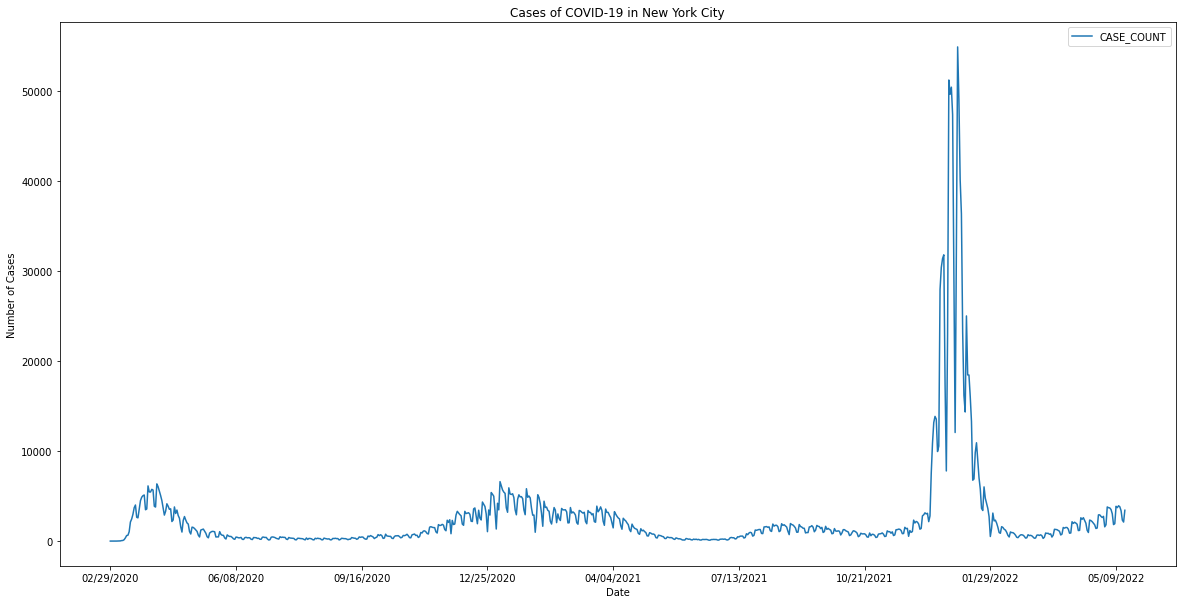

In [10]:
case_data = pd.read_csv("cases-by-day.csv")

case_data.plot("date_of_interest", "CASE_COUNT", xlabel = "Date", ylabel = "Number of Cases",
               title = "Cases of COVID-19 in New York City")

Looking at COVID-19 case data from New York City, we can see that the first spike in hate crimes against Asian Americans is correlated with the first spike in COVID cases during March 2020. However, there doesn't seem to be a rise in COVID cases that correlates with the second spike in hate crimes. To supplement this case data, we'll also look at the vaccination data for New York City.

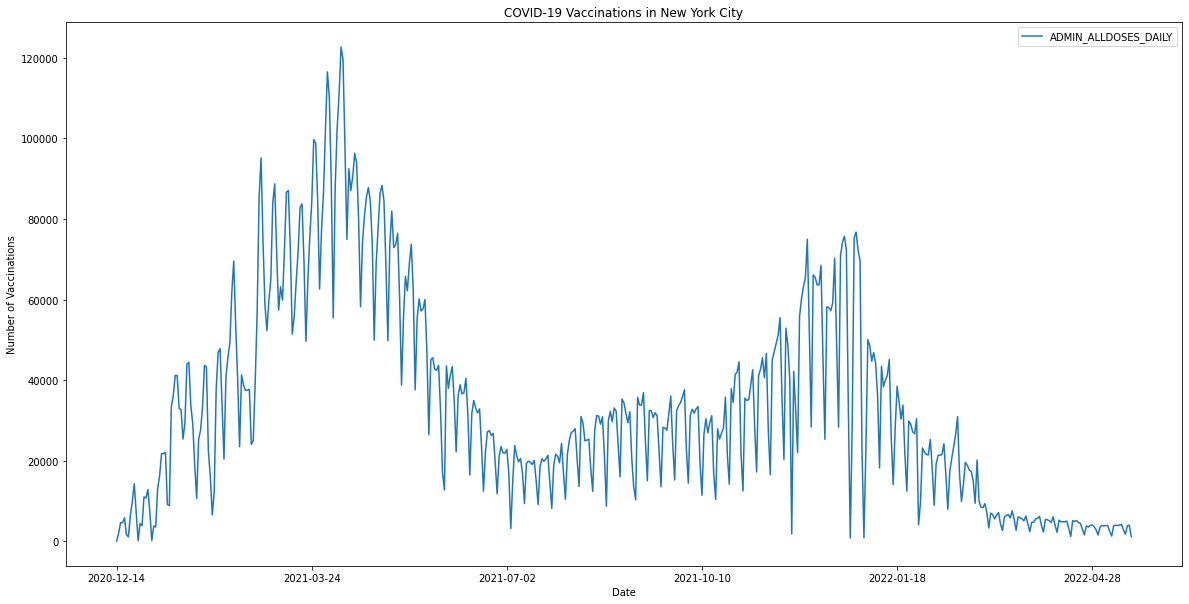

In [15]:
vax_data = pd.read_csv("doses-by-day.csv")
vax_data.plot("DATE", "ADMIN_ALLDOSES_DAILY", xlabel = "Date", ylabel = "Number of Vaccinations",
              title = "COVID-19 Vaccinations in New York City")

Here, we can clearly see that there is a correlation with the rise in vaccination rates and the spike in anti-Asian hate crimes during March and April of 2021. Of course, correlation is not causation, and there could be other factors influencing these numbers. However, given the link between COVID-19 and wrongly blaming Asian Americans, it is likely the two are related. To further understand what the relationship between COVID-19 events and anti-Asian hate crimes is, we could also plot the dates of important occurances other than cases/vaccinations rising, like the enforcement of mask mandates, city-wide shutdowns, etc.

There are many further analyses that are possible with this data. For example, we might look at which precints have the highest numbers of anti-Asian hate crimes, and whether those precincts are those with the highest Asian populations. We also might look at whether the severities of these crimes have increased or decreased by looking at the numbers of infractions, misdemeanors, and felonies over time.